In [18]:
!pip install -U albumentations
!pip install ttach
!pip install torch-lr-finder

In [19]:
!git clone "https://github.com/vvshankar78/Pytorch_Wrapper.git"
!git clone "https://github.com/jacobgil/pytorch-grad-cam.git"

fatal: destination path 'Pytorch_Wrapper' already exists and is not an empty directory.
fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.


In [ ]:
import requests, zipfile, io
import sys, os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision
# Download Data
import requests, zipfile, io
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau
from torchsummary import summary

import os
import urllib.request
import zipfile
from random import shuffle
from math import floor
import sys, os

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

fatal: destination path 'Pytorch_Wrapper' already exists and is not an empty directory.
fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.


In [ ]:

my_path = '/content/Pytorch_Wrapper'
sys.path.append(my_path)
from config import ModelConfig
from data.data_download import download_dataset, unzip_data, format_val
from data import data_engine
from data.data_engine import DataEngine

In [ ]:
args = ModelConfig()
args.print_config()

Model Parameters:
{ 'batch_size_cpu': 128,
  'batch_size_cuda': 256,
  'dataset': 'Imagenet',
  'dropout': 0,
  'epochs': 8,
  'l1_decay': 0,
  'l2_decay': 0.005,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'peak': 5,
  'seed': 1,
  'target_zip': '/tiny-imagenet-200.zip',
  'train_data_path': '/tiny-imagenet-200/train',
  'train_data_path_engine': '/content/tiny-imagenet-200/train',
  'url': 'http://cs231n.stanford.edu/tiny-imagenet-200.zip',
  'val_data_path': '/tiny-imagenet-200/val',
  'val_data_path_engine': '/content/tiny-imagenet-200/val'}


In [ ]:
def data_download_clean(args):
  download_dataset(args)
  unzip_data(args)
  format_val(args)


In [ ]:
data_download_clean(args)

Beginning dataset download with urllib2
Dataset downloaded
Extracting zip file: /content/tiny-imagenet-200.zip
Extracted at: /content
Formatting: /content/tiny-imagenet-200/val
Cleaning up: /content/tiny-imagenet-200/val/images
Formatting val done


In [ ]:
def get_data():
  # View model config
  args.print_config()
  print(args.epochs)

  data = DataEngine(args)
  train_loader= data.train_loader
  val_loader = data.val_loader
  return data, train_loader, val_loader

data,train_loader, val_loader = get_data()

Model Parameters:
{ 'batch_size_cpu': 128,
  'batch_size_cuda': 256,
  'dataset': 'Imagenet',
  'dropout': 0,
  'epochs': 8,
  'l1_decay': 0,
  'l2_decay': 0.005,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'peak': 5,
  'seed': 1,
  'target_zip': '/tiny-imagenet-200.zip',
  'train_data_path': '/tiny-imagenet-200/train',
  'train_data_path_engine': '/content/tiny-imagenet-200/train',
  'url': 'http://cs231n.stanford.edu/tiny-imagenet-200.zip',
  'val_data_path': '/tiny-imagenet-200/val',
  'val_data_path_engine': '/content/tiny-imagenet-200/val'}
8
generating datasets for Imagenet


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


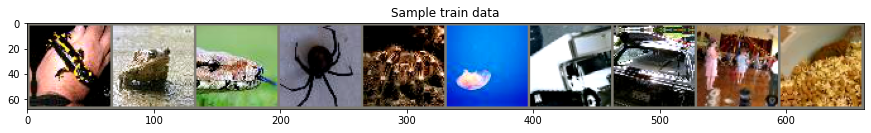

In [ ]:
data.show_samples()

In [ ]:
# img, label = next(iter(train_loader))
# label

In [ ]:
# img, label = next(iter(val_loader))
# label

In [ ]:
# img.shape

In [ ]:
# plt.imshow(img[0].numpy().squeeze().transpose(1,2,0), cmap='gray_r')

In [ ]:
from models import Resnet
model = Resnet.ResNet18(num_classes=200).to(device)

In [ ]:
def show_model_summary(model, input_size):
	print(summary(model, input_size=input_size))
 
show_model_summary(model, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
from train import train
from test1 import test
def run_model(model, train_loader, test_loader, max_lr=0.1):
  history = {}
  EPOCHS = args.epochs
  l1_decay=0.0
  l2_decay=0.0
  peak = args.peak # epoch you want the max lr. 
  peak_pct = peak/EPOCHS
  lrs = []

  # model = Net().to(device)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  # scheduler = StepLR(optimizer, step_size=25, gamma=0.5)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, steps_per_epoch=len(train_loader),
                                                  epochs=EPOCHS,
                                                  pct_start=peak_pct, 
                                                  anneal_strategy='linear')

  # run_model(model, optimizer, scheduler, EPOCHS, l1=0.0, l2=0.0)

  train_loss_list = []
  train_accuracy_list = []
  test_loss_list = []
  test_accuracy_list = []
  misclassified_imgs = []
  lr_trend = []
  for epoch in range(EPOCHS):
      lr_trend.append(optimizer.param_groups[0]['lr'])
      print(f"EPOCH: {epoch+1} (LR: {lr_trend[-1]:0.6f})")
      train_loss_list, train_accuracy_list = train(model, device, train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, train_loss_list, train_accuracy_list, scheduler)
      # print("\nlearning rate", optimizer.param_groups[0]['lr'])
      # scheduler.step()
      # test(model1, device, test_loader, test_losses, test_acc, misclassified_imgs, epoch==EPOCHS-1)
      test_loss_list, test_accuracy_list, misclassified_imgs = test(model, device, test_loader, criterion, test_loss_list, test_accuracy_list, misclassified_imgs, epoch==EPOCHS-1)

  name = 'Resnet18'
  history[name] = {}
  history[name]['train_loss'] = train_loss_list
  history[name]['train_accuracy'] = train_accuracy_list
  history[name]['test_loss'] = test_loss_list
  history[name]['test_accuracy'] = test_accuracy_list
  history[name]['misclassified_imgs'] = misclassified_imgs
  return history


In [ ]:

history = run_model(model, train_loader, val_loader, max_lr=3.5e-2)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 (LR: 0.001400)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=4.038023471832275 Batch_id=390 Accuracy=7.06: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]

length of Average loss 391, length of Average accuracy 391



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0171, Accuracy: 1021/10000 (10.21%)
EPOCH: 2 (LR: 0.008123)


Loss=3.3723244667053223 Batch_id=390 Accuracy=17.70: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]

length of Average loss 782, length of Average accuracy 782



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0145, Accuracy: 1886/10000 (18.86%)
EPOCH: 3 (LR: 0.014847)


Loss=3.093755006790161 Batch_id=390 Accuracy=25.82: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]

length of Average loss 1173, length of Average accuracy 1173



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0147, Accuracy: 2136/10000 (21.36%)
EPOCH: 4 (LR: 0.021570)


Loss=2.9625957012176514 Batch_id=390 Accuracy=32.40: 100%|██████████| 391/391 [03:25<00:00,  1.91it/s]

length of Average loss 1564, length of Average accuracy 1564



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0124, Accuracy: 2889/10000 (28.89%)
EPOCH: 5 (LR: 0.028294)


Loss=2.5026471614837646 Batch_id=390 Accuracy=37.32: 100%|██████████| 391/391 [03:25<00:00,  1.91it/s]

length of Average loss 1955, length of Average accuracy 1955



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0113, Accuracy: 3315/10000 (33.15%)
EPOCH: 6 (LR: 0.034970)


Loss=2.392677068710327 Batch_id=390 Accuracy=42.00: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]

length of Average loss 2346, length of Average accuracy 2346



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0108, Accuracy: 3732/10000 (37.32%)
EPOCH: 7 (LR: 0.023304)


Loss=2.0838136672973633 Batch_id=390 Accuracy=47.30: 100%|██████████| 391/391 [03:25<00:00,  1.91it/s]

length of Average loss 2737, length of Average accuracy 2737



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 4403/10000 (44.03%)
EPOCH: 8 (LR: 0.011637)


Loss=1.9895541667938232 Batch_id=390 Accuracy=53.72: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]

length of Average loss 3128, length of Average accuracy 3128


Test set: Average loss: 0.0077, Accuracy: 5287/10000 (52.87%)


In [ ]:
# run_model(model, train_loader, val_loader)

In [ ]:
from utils import *

In [ ]:
def get_training_curves(history):
  training_curves(history)
  matplotlib.pyplot.show()

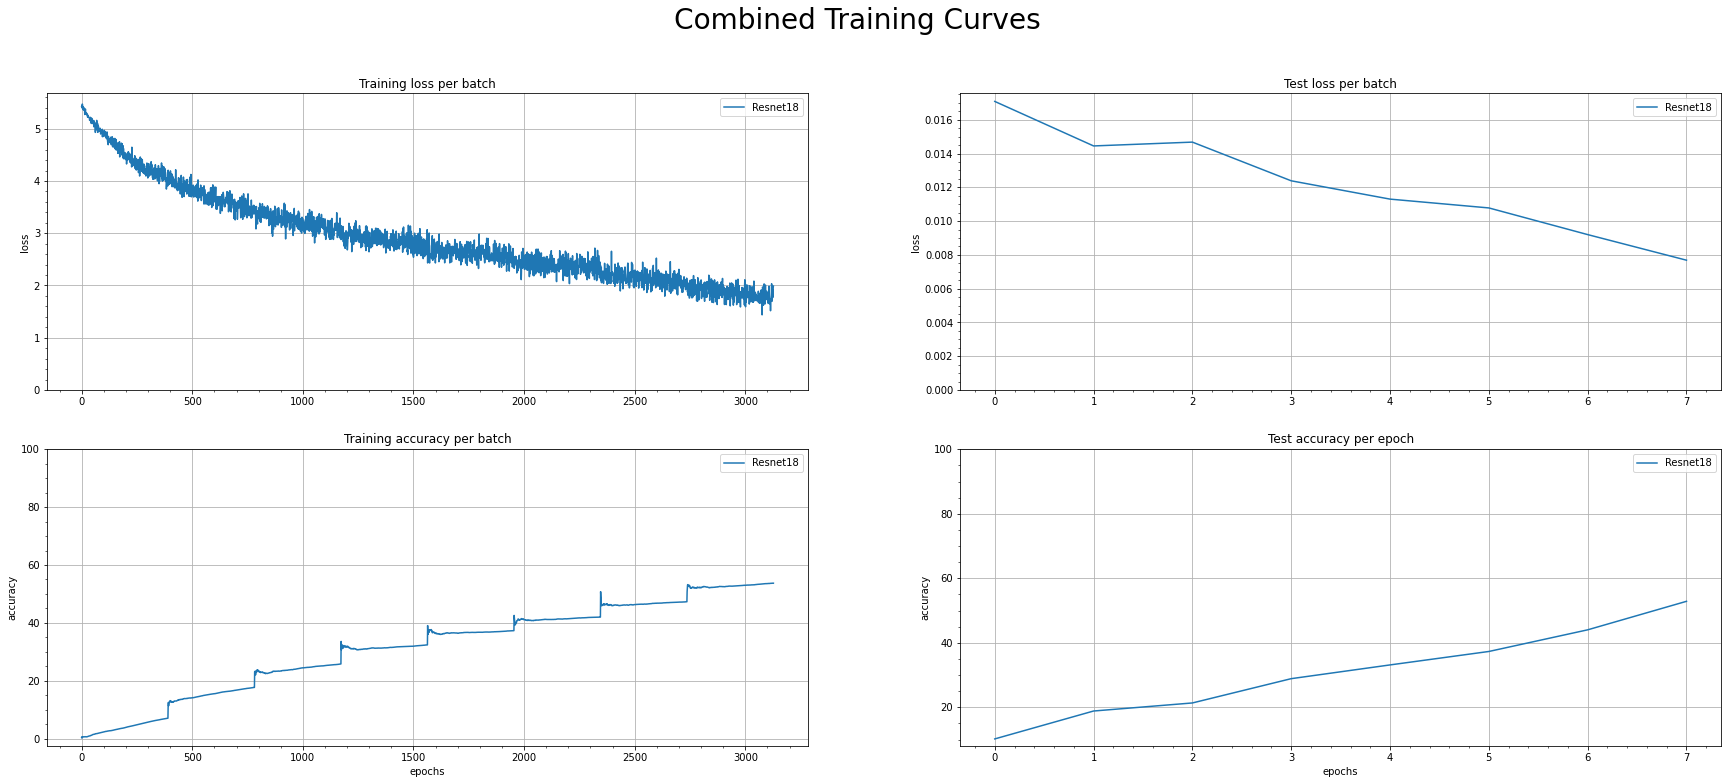

In [ ]:
get_training_curves(history)

In [ ]:
def get_show_misclassified(model, test_loader, num_of_images=20):
  misclass_img_list, misclass_img_category = show_misclassified(model, test_loader, device, classes, num_of_images)
  matplotlib.pyplot.show()
  save_misclassified_img(misclass_img_list)

In [ ]:
# get_show_misclassified(model, val_loader, num_of_images=20)

NameError: ignored